In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
 
x = load_iris().data
y = load_iris().target

In [6]:
x.shape

(150, 4)

In [7]:
from sklearn.cluster import KMeans

In [8]:
list1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    list1.append(kmeans.inertia_)

In [9]:
print(list1)

[681.3706000000001, 152.34795176035792, 78.8556658259773, 57.35088021295475, 46.472230158730156, 39.21125347985348, 34.996821411021415, 32.97049009600651, 31.380594728800617, 27.58605721076309]


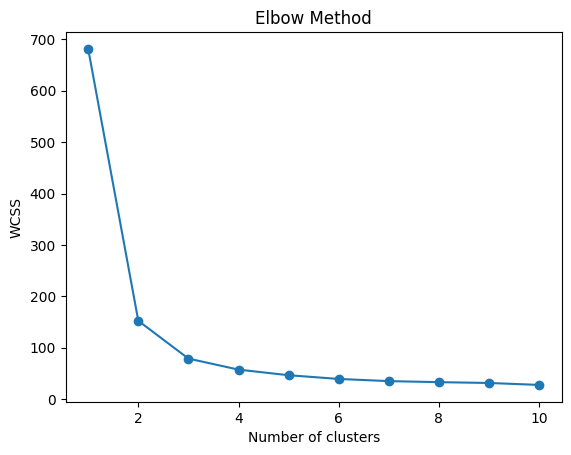

In [10]:
#creating the scree plot 
plt.plot(range(1,11),list1,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
# from the graph we get the elbow at 3 so we consider the number of clusters 3

In [75]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_predicted=kmeans.predict(x)


In [76]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [82]:
import pandas
data = {'Original':y,'Predicted': y_predicted}
kmeansdf = pandas.DataFrame(data,columns=['Original',"Predicted"])

In [83]:
print(kmeansdf["Predicted"].value_counts())
print(kmeansdf["Original"].value_counts())

Predicted
2    61
0    50
1    39
Name: count, dtype: int64
Original
0    50
1    50
2    50
Name: count, dtype: int64


In [84]:
kmeansdf['Original'].replace(to_replace=int("0"),value="setosa",inplace=True)
kmeansdf['Original'].replace(to_replace=int("1"),value='versicolor',inplace=True)
kmeansdf['Original'].replace(to_replace=int("2"),value = "virginaca",inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("0"),value="setosa",inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("1"),value='versicolor',inplace=True)
kmeansdf['Predicted'].replace(to_replace=int("2"),value = "virginaca",inplace=True)

C:\Users\mahto\AppData\Local\Temp\ipykernel_28192\2716586726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kmeansdf['Original'].replace(to_replace=int("0"),value="setosa",inplace=True)
C:\Users\mahto\AppData\Local\Temp\ipykernel_28192\2716586726.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [73]:
kmeansdf.head(10)

,Original,Predicted
0,setosa,setosa
1,setosa,setosa
2,setosa,setosa
3,setosa,setosa
4,setosa,setosa
5,setosa,setosa
6,setosa,setosa
7,setosa,setosa
8,setosa,setosa
9,setosa,setosa


In [85]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(kmeansdf['Original'],kmeansdf['Predicted'])
print("the confusion matrix is : \n",results)

the confusion matrix is : 
 [[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]
